<a href="https://colab.research.google.com/github/Raven-DM/Data-Science/blob/main/Boston_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Analysis Using Two Different Algorithms
To conduct regression analysis using two different algorithms, the ‘Boston House Prices’ dataset from Kaggle (source) was selected.

The two regression algorithms used in this study are:

1. Linear Regression
2. Random Forest Regressor

The dataset includes the following features:

CRIM: Crime rate per capita by town

ZN: Proportion of residential land zoned for lots larger than 25,000 square feet

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (1 if the tract bounds the river; 0 otherwise)

NOX: Nitrogen oxide concentration (ppm)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built before 1940

DIS: Weighted distance to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio

B:
1000
(
𝐵
𝑘
−
0.63
)
^2
 , where
𝐵
𝑘
​
  is the proportion of Black residents by town

LSTAT: Percentage of lower-status population

MEDV: Median value of owner-occupied homes (in $1000)

This dataset serves as a benchmark for evaluating the performance of regression models in predicting housing prices.

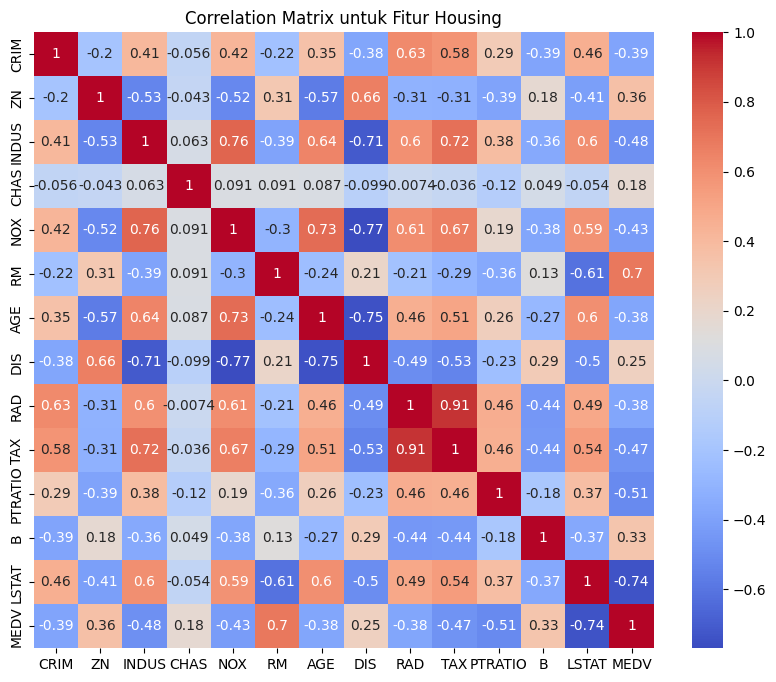

In [ ]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV and assign dataset header
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
file_path = 'housing.csv'

# Convert CSV data to dataframe
with open(file_path, newline='') as csvfile:
  data_reader = csv.reader(csvfile)
  data = list(data_reader)

df = pd.DataFrame(data, columns=column_names)
df = df.astype(float)   # konversi tipe data ke float untuk analisis numerik

# EDA: Basic statistic details & Correlation Matrix
basic_stats = df.describe()

corr_matrix = df.corr()

#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix untuk Fitur Housing')
plt.show()

Exploratory Data Analysis (EDA) Using Descriptive Statistics and Correlation Matrix

The exploratory data analysis (EDA) was conducted using descriptive statistics and a correlation matrix. The key findings are as follows:

CRIM (Crime Rate per Capita): The average crime rate per capita varies significantly, with very low minimum values and extremely high maximum values, indicating a substantial disparity in safety across different areas.

RM (Average Number of Rooms per Dwelling): The number of rooms ranges from 3.561 to 8.780, with an average of 6.285, highlighting the variation in house sizes.

AGE (Proportion of Owner-Occupied Units Built Before 1940): Most properties in the city were constructed before 1940, with an average property age of 68.575 years.

MEDV (Median Owner-Occupied Home Value): The median home value ranges from $5,000 to $50,000, with an average of approximately $22,533.

Correlation Analysis:

RM (Average Number of Rooms) has the strongest positive correlation with MEDV at 0.695, indicating that homes with more rooms tend to have higher prices.
LSTAT (Percentage of Lower-Status Population) has the strongest negative correlation with MEDV at -0.738, meaning that areas with a higher proportion of lower-status residents tend to have lower home prices.

In [ ]:
# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split training and test data with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Features normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the result of splitting data
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


(404, 13) (102, 13) (404,) (102,)


In [ ]:
# Training Linear Regression and Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
linear_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Prediction process on test data
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation performance of model using RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(rmse_linear, rmse_rf)

4.928602182665336 2.8129602438238144


**Model Performance Comparison**

Linear Regression RMSE = 4.93

Random Forest Regressor RMSE = 2.81

Based on the evaluation results, the Random Forest Regressor outperforms Linear Regression, as indicated by its lower Root Mean Squared Error (RMSE) (2.81 vs. 4.93).


**Conclusion**

In the case of the Boston Housing dataset, the Random Forest Regressor provides more accurate house price predictions compared to the Linear Regression model. The following visualization illustrates the predicted values versus actual data for both algorithms.